In [1]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [2]:
path = '/Users/zeynep/Desktop/Master\'s Thesis/DATA ANALYSIS/wiki-news-300d-1M.vec'

In [3]:
vectors = load_vectors(path)

In [4]:
#vectors

{',': <map at 0x104d17eb8>,
 'the': <map at 0x104d1c240>,
 '.': <map at 0x104d20550>,
 'and': <map at 0x104d24898>,
 'of': <map at 0x104d28be0>,
 'to': <map at 0x104d2cf28>,
 'in': <map at 0x104d312b0>,
 'a': <map at 0x104d355c0>,
 '"': <map at 0x104d398d0>,
 ':': <map at 0x104d3dbe0>,
 ')': <map at 0x104d41ef0>,
 'that': <map at 0x104d46278>,
 '(': <map at 0x104d4a588>,
 'is': <map at 0x104d4e8d0>,
 'for': <map at 0x104d52c18>,
 'on': <map at 0x104d56f60>,
 '*': <map at 0x104d5b2b0>,
 'with': <map at 0x104d5f5f8>,
 'as': <map at 0x104d63978>,
 'it': <map at 0x104d67cf8>,
 'The': <map at 0x104d6c0b8>,
 'or': <map at 0x104d70438>,
 'was': <map at 0x104d747b8>,
 "'": <map at 0x104d78b00>,
 "'s": <map at 0x104d7ce80>,
 'by': <map at 0x104d81240>,
 'from': <map at 0x104d855c0>,
 'at': <map at 0x104d89940>,
 'I': <map at 0x104d8dc88>,
 'this': <map at 0x104d92048>,
 'you': <map at 0x104d963c8>,
 '/': <map at 0x104d9a710>,
 'are': <map at 0x104d9ea90>,
 '=': <map at 0x104da2dd8>,
 'not': <ma

In [5]:
# for k, v in vectors.items():
#     vectors[k] = list(v)

In [4]:
import pandas as pd
data = pd.read_csv("clean-features.csv")
data = data.dropna(subset=['question'])

In [8]:
import numpy as np
def execute(data, model_vectors):
    counter = 0
    all_rows = []
    seen_vectors_by_question = {}
    print('starting')
    for index, item in data.iterrows():
        counter += 1
        if counter % 10000 == 0 or counter == 0:
            print('Processing %s. item' % counter)

        row      = item.get_values()
        question = row[5]
        words    = question.split()

        vectors = []
        if question in seen_vectors_by_question:
            vectors_seen_before = seen_vectors_by_question[question]
            if len(vectors_seen_before) > 0:
                vectors = vectors_seen_before
        else:
            for word in words:        
                if word in model_vectors:
                    model_vectors[word] = list(model_vectors[word])
                    if len(vectors) == 0:
                        vectors = np.array(model_vectors[word])
                    else:
                        vectors += np.array(model_vectors[word])
            seen_vectors_by_question[question] = vectors

        if len(vectors) == 0:
            # when we can't find vectors for the question
            # we skip adding it to all_rows. is that what we want?
            continue

        vectors_avg = [x / len(words) for x in vectors]

        row = np.append(row, vectors_avg)
        all_rows.append(row)

    print('Done. All count %s' % len(all_rows))
    return all_rows

In [9]:
all_rows = execute(data, vectors)

starting
Processing 10000. item
Processing 20000. item
Processing 30000. item
Processing 40000. item
Processing 50000. item
Processing 60000. item
Processing 70000. item
Processing 80000. item
Processing 90000. item
Processing 100000. item
Processing 110000. item
Processing 120000. item
Processing 130000. item
Processing 140000. item
Processing 150000. item
Processing 160000. item
Processing 170000. item
Processing 180000. item
Processing 190000. item
Processing 200000. item
Processing 210000. item
Processing 220000. item
Processing 230000. item
Processing 240000. item
Processing 250000. item
Processing 260000. item
Processing 270000. item
Processing 280000. item
Processing 290000. item
Processing 300000. item
Done. All count 304560


In [11]:
len(all_rows)

304560

In [12]:
#writing all_rows to csv
columns  = ['hair', 'eyes','age', 'true_answer', 'FaceID', 'question', 'ethnicity', 'gender']

vwList = []
for i in range(1, 301): 
    vwList.append("fastVec"+str(i))
columns.extend(vwList)

In [13]:
import csv
csv_file = open("fasttext-data-avg.csv", "w")

# columns = ['faceId', 'age', 'ethnicity', 'gender', 'hair', 'questions', 'responses']
csv_writer = csv.writer(csv_file)
# csv_writer.writeheader()
csv_writer.writerow(columns)
csv_writer.writerows(all_rows)

csv_file.close()

In [14]:
import pandas as pd
data = pd.read_csv("fasttext-data-avg.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304560 entries, 0 to 304559
Columns: 308 entries, hair to fastVec300
dtypes: float64(300), object(8)
memory usage: 715.7+ MB


In [17]:
import pandas as pd
data = pd.read_csv("clean-features.csv")
data = data.dropna(subset=['question'])

In [18]:
import numpy as np
def execute(data, model_vectors):
    counter = 0
    all_rows = []
    seen_vectors_by_question = {}
    print('starting')
    for index, item in data.iterrows():
        counter += 1
        if counter % 10000 == 0 or counter == 0:
            print('Processing %s. item' % counter)

        row      = item.get_values()
        question = row[5]
        words    = question.split()

        vectors = []
        if question in seen_vectors_by_question:
            vectors_seen_before = seen_vectors_by_question[question]
            if len(vectors_seen_before) > 0:
                vectors = vectors_seen_before
        else:
            for word in words:        
                if word in model_vectors:
                    model_vectors[word] = list(model_vectors[word])
                    if len(vectors) == 0:
                        vectors = np.array(model_vectors[word])
                    else:
                        vectors += np.array(model_vectors[word])
            seen_vectors_by_question[question] = vectors

        if len(vectors) == 0:
            # when we can't find vectors for the question
            # we skip adding it to all_rows. is that what we want?
            continue

        row = np.append(row, vectors)
        all_rows.append(row)


    print('Done. All count %s' % len(all_rows))
    return all_rows

In [19]:
all_rows = execute(data, vectors)

starting
Processing 10000. item
Processing 20000. item
Processing 30000. item
Processing 40000. item
Processing 50000. item
Processing 60000. item
Processing 70000. item
Processing 80000. item
Processing 90000. item
Processing 100000. item
Processing 110000. item
Processing 120000. item
Processing 130000. item
Processing 140000. item
Processing 150000. item
Processing 160000. item
Processing 170000. item
Processing 180000. item
Processing 190000. item
Processing 200000. item
Processing 210000. item
Processing 220000. item
Processing 230000. item
Processing 240000. item
Processing 250000. item
Processing 260000. item
Processing 270000. item
Processing 280000. item
Processing 290000. item
Processing 300000. item
Done. All count 304560


In [20]:
#writing all_rows to csv
columns  = ['hair', 'eyes','age', 'true_answer', 'FaceID', 'question', 'ethnicity', 'gender']

vwList = []
for i in range(1, 301): 
    vwList.append("fastVec"+str(i))
columns.extend(vwList)

In [21]:
import csv
csv_file = open("fasttext-data-add.csv", "w")
csv_writer = csv.writer(csv_file)

csv_writer.writerow(columns)
csv_writer.writerows(all_rows)

csv_file.close()

In [22]:
import pandas as pd
data = pd.read_csv("fasttext-data-add.csv")
data.head()

,hair,eyes,age,true_answer,FaceID,question,ethnicity,gender,fastVec1,fastVec2,...,fastVec291,fastVec292,fastVec293,fastVec294,fastVec295,fastVec296,fastVec297,fastVec298,fastVec299,fastVec300
0,blond,brown,25-34,yes,IMG_9891,hair long,white,female,-0.1082,0.0588,...,-0.1227,-0.08,0.1205,0.0715,0.0522,0.1264,0.1476,0.3033,-0.1004,0.1057
1,brown,brown,25-34,yes,IMG_0153,hair long,white,female,-0.1082,0.0588,...,-0.1227,-0.08,0.1205,0.0715,0.0522,0.1264,0.1476,0.3033,-0.1004,0.1057
2,brown,brown,45-54,no,IMG_0446,hair long,white,female,-0.1082,0.0588,...,-0.1227,-0.08,0.1205,0.0715,0.0522,0.1264,0.1476,0.3033,-0.1004,0.1057
3,blond,blue,35-44,no,IMG_9484,hair long,white,female,-0.1082,0.0588,...,-0.1227,-0.08,0.1205,0.0715,0.0522,0.1264,0.1476,0.3033,-0.1004,0.1057
4,brown,brown,25-34,yes,IMG_9846,hair long,white,male,-0.1082,0.0588,...,-0.1227,-0.08,0.1205,0.0715,0.0522,0.1264,0.1476,0.3033,-0.1004,0.1057


# ANALYSIS

In [3]:
df = df.drop(columns = ['question', 'FaceID'])
df = df.astype('category')

df['true_answer'] = df['true_answer'].cat.codes
df['gender'] = df['gender'].cat.codes
df['hair'] = df['hair'].cat.codes
df['eyes'] = df['eyes'].cat.codes
df['ethnicity'] = df['ethnicity'].cat.codes

df = pd.DataFrame(df, dtype = 'float')

In [93]:
df['true_answer'].value_counts()

0.0    169590
1.0    134970
Name: true_answer, dtype: int64

## Naive Bayes 

In [4]:
y = df["true_answer"]
X = df.drop(columns = ["true_answer"])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state= 109)

In [18]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [23]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.5558674809561335


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test = lr.predict(X_test)
print(accuracy_score(y_expect, y_pred))

NameError: name 'y_expect' is not defined

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


## K-NN

In [26]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


## Random Forest

In [37]:
from math import sqrt

n_features = 307
print(sqrt(n_features))

17.52141546793523


In [38]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
#Create a Gaussian Classifier
clf=RandomForestClassifier(max_features = 17)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753513265038088


## Applying PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [7]:
finalDf = pd.concat([principalDf, df[['true_answer']]], axis = 1)

In [79]:
finalDf rename({'0': 'PC1', '1': 'PC2', '2':'PC3', '3':'PC4', 'true_answer':'target'}, axis=1)


AttributeError: module 'pandas' has no attribute 'finalDf'

KeyError: 'the label [0] is not in the [columns]'

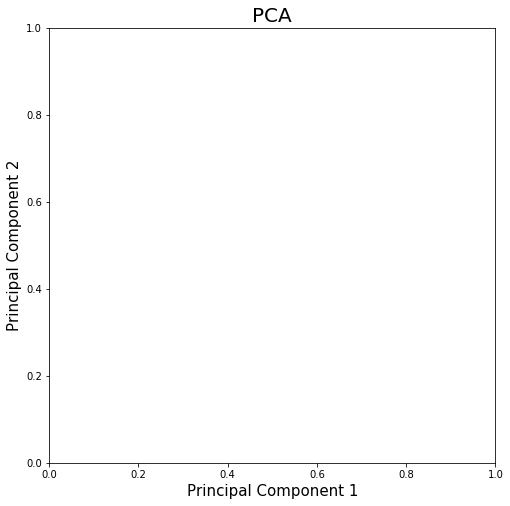

In [82]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['true_answer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, '0']
               , finalDf.loc[indicesToKeep, '1']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [97]:
pca.explained_variance_ratio_

array([0.51396597, 0.10353837, 0.09429685, 0.04567328, 0.04233548,
       0.02998485, 0.01851441, 0.01411598, 0.01372719, 0.01259218,
       0.00947027, 0.0083868 , 0.00704916, 0.00608459, 0.00485774,
       0.00378989, 0.00347994, 0.00332913, 0.00313089, 0.0028751 ,
       0.0025867 , 0.0024422 , 0.00214131, 0.00203366])

### ANALYSIS AFTER PCA

In [8]:
X = finalDf.drop(columns = ['true_answer'])
y = finalDf['true_answer']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state= 0)

In [29]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)
y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.5577390333596007


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


In [31]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


In [100]:
from math import sqrt
sqrt(23)

4.795831523312719

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(max_features = 5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6732335172051485


In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from datetime import datetime
print('Done [%s]' % datetime.now().strftime('%Y-%m-%d %H:%M:%S'))